In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [15]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

In [16]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

In [17]:
class Net(torch.nn.Module):
       def __init__(self):
           super(Net, self).__init__()
           self.fc1 = torch.nn.Linear(28*28, 128)
           self.fc2 = torch.nn.Linear(128, 64)
           self.fc3 = torch.nn.Linear(64, 10)

       def forward(self, x):
           x = x.view(-1, 28*28)
           x = torch.relu(self.fc1(x))
           x = torch.relu(self.fc2(x))
           x = self.fc3(x)
           return x

model = Net()

In [18]:
#定义损失函数和优化器
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.39178441225815175
Training loss: 0.19045792062526573
Training loss: 0.1385348794290792
Training loss: 0.11277361777223853
Training loss: 0.09443483427008077


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 96 %


In [22]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 96.89 %


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

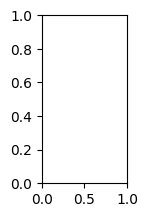

In [24]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# 定义数据转换
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# 加载数据集
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

# 获取一批数据
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 定义一个函数来显示图片
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

# 显示10张图片
images = images.numpy()  # 转换为numpy数组
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 创建2x5的子图布局
    imshow(images[i])  # 显示每张图片

# 或者，使用grid显示所有图片
# grid = torchvision.utils.make_grid(images)
# imshow(grid)